|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif" > |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|

### Section 10.6, Conduction de la chaleur dans un plan


In [1]:
#
# Pierre Proulx
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)
%matplotlib inline

<img src='http://pierreproulx.espaceweb.usherbrooke.ca/images/paroiComposite.png'>

In [2]:
# Paramètres, variables et fonctions
x,k01,k12,k23,h0,h3=sp.symbols('x k_1 k_2 k_3 h_0 h_3') 
x0,x1,x2,x3,Ta,Tb=sp.symbols('x_0 x_1 x_2 x_3 T_a T_b')                                                            
q=sp.symbols('q')
T=sp.Function('T')(x)     

In [3]:
eq1=sp.Eq(k01*sp.Derivative(sp.Derivative(T,x)),0)
eq2=sp.Eq(k12*sp.Derivative(sp.Derivative(T,x)),0)
eq3=sp.Eq(k23*sp.Derivative(sp.Derivative(T,x)),0)
T1=sp.dsolve(eq1).rhs
T2=sp.dsolve(eq2)
T2=T2.subs(sp.symbols('C1'),sp.symbols('C3'))
T2=T2.subs(sp.symbols('C2'),sp.symbols('C4')).rhs
T3=sp.dsolve(eq3)
T3=T3.subs(sp.symbols('C1'),sp.symbols('C5'))
T3=T3.subs(sp.symbols('C2'),sp.symbols('C6')).rhs
display(T1)
display(T2)
display(T3)

In [4]:
# Maintenant on pose les conditions aux limites pour trouver les 6 constantes
cl1=sp.Eq(T1.subs(x,x1)-T2.subs(x,x1))   # températures égales sur les points intérieurs
cl2=sp.Eq(T2.subs(x,x2)-T3.subs(x,x2))
#                           flux égaux sur les points intérieurs
cl3=sp.Eq(k01*T1.diff(x).subs(x,x1)-k12*T2.diff(x).subs(x,x1))
cl4=sp.Eq(k12*T2.diff(x).subs(x,x2)-k23*T3.diff(x).subs(x,x2))
#                           flux donnés par la loi de refroidissement de Newton sur les parois
cl5=sp.Eq(-k01*T1.diff(x).subs(x,x0)+h0*(T1.subs(x,x0)-Ta))
cl6=sp.Eq(-k23*T3.diff(x).subs(x,x3)+h3*(Tb-T3.subs(x,x3)))

'profils de températures dans les trois plans avant de substituer des valeurs'

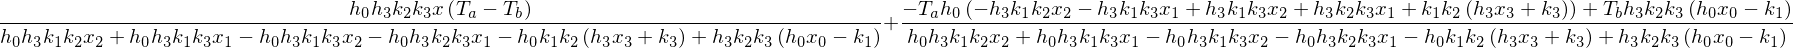

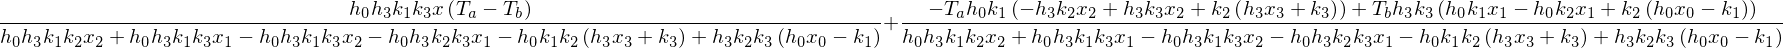

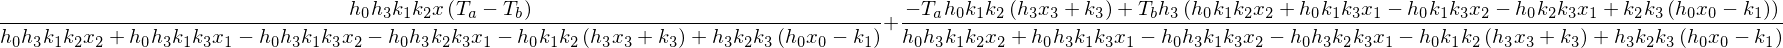

'profils de températures dans les trois plans après substitution'

In [5]:
constantes=sp.solve((cl1,cl2,cl3,cl4,cl5,cl6),sp.symbols('C1 C2 C3 C4 C5 C6'))
T1=T1.subs(constantes)
T2=T2.subs(constantes)
T3=T3.subs(constantes)
display('profils de températures dans les trois plans avant de substituer des valeurs',T1,T2,T3)
dico={'k_1':4,'k_2':25,'k_3':1,
      'h_0':1000,'h_3':2000,'x_0':0.0,'x_1':0.025,'x_2':0.050,'x_3':0.085,'T_a':100,'T_b':20}
T1p=T1.subs(dico).evalf(3)
T2p=T2.subs(dico).evalf(3)
T3p=T3.subs(dico).evalf(3)
display('profils de températures dans les trois plans après substitution',T1p,T2p,T3p)

1828.57142857142*L*W 1828.57142857141*L*W


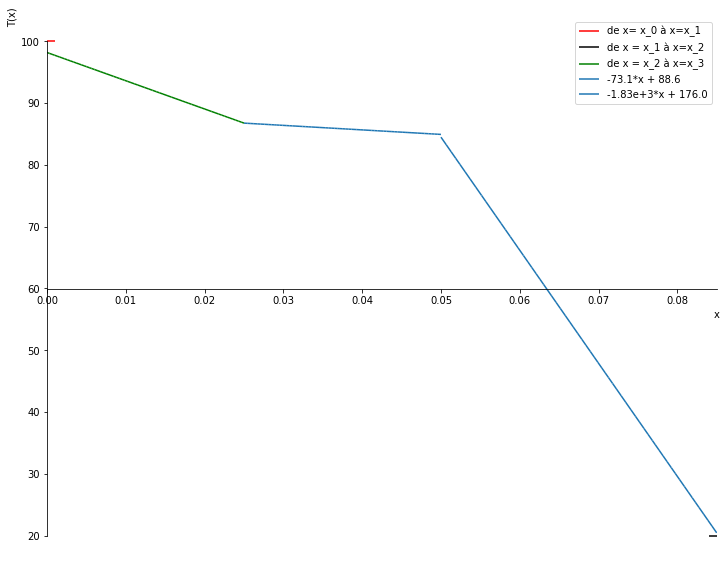

In [6]:
# Calcule les taux de chaleur en 0 et en 3 (doivent être égaux) (watts)
#
W,L=sp.symbols('W L')
taux3=(h3*(T3-Tb)).subs(dico)*W*L     # pour mettre les valeurs numériques dans
taux0=(h0*(Ta-T1)).subs(dico)*W*L      # l'expression symbolique, on subs(dico)
#
print(taux3.subs(x,x3.subs(dico)), taux0.subs(x,x0.subs(dico))) 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 10
#plt.figure(figsize=(12,10))
Tap=sp.symbols('Tap')
Tap=Ta
Tbp=sp.symbols('Tbp')
Tbp=Tb
p=sp.plot((Tap.subs(dico),(x,x0.subs(dico),x0.subs(dico)+0.001))
         ,(Tbp.subs(dico),(x,x3.subs(dico)-0.001,x3.subs(dico)))
         ,(T1p,(x,x0.subs(dico),x1.subs(dico)))
         ,(T2p,(x,x1.subs(dico),x2.subs(dico)))
         ,(T3p,(x,x2.subs(dico),x3.subs(dico)))
         ,legend=True,ylabel='T(x)',xlabel='x',show=False) #affiche pas tout de suite
p[0].line_color = 'red'
p[0].label='de x= x_0 à x=x_1 '
p[1].line_color = 'black'
p[1].label='de x = x_1 à x=x_2 '
p[2].line_color = 'green'
p[2].label='de x = x_2 à x=x_3 '
p.show()                         # maintenant on est prêts à afficher
## attention, les deux petites lignes ajoutées en Ta et Tb sont pour montrer la différence
## entre les températures du milieu ambiant et la surface, jouez avec h0 et h3 pour voir...